In [2]:
# Import library yang di butuhkan
import pandas as pd
from sklearn.impute import SimpleImputer

In [3]:
#Import dataset
dataset_game= pd.read_csv("vgsales.csv")
dataset_game.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### DATA CLEANING

In [4]:
dataset_clean = dataset_game.copy()

In [5]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16600 entries, 0 to 16599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16600 non-null  int64  
 1   Name          16600 non-null  object 
 2   Platform      16600 non-null  object 
 3   Year          16329 non-null  float64
 4   Genre         16600 non-null  object 
 5   Publisher     16542 non-null  object 
 6   NA_Sales      16600 non-null  float64
 7   EU_Sales      16600 non-null  float64
 8   JP_Sales      16600 non-null  float64
 9   Other_Sales   16600 non-null  float64
 10  Global_Sales  16600 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
dataset_clean.isna().sum() #Mengecek data yang kosong

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#Deklarasi kelas SimpleImputer dan lakukan transformasi pada kolom yang ingin diubah
imputer_mean= SimpleImputer (strategy='mean')
imputer_median= SimpleImputer (strategy='median')
imputer_modus= SimpleImputer (strategy='most_frequent')

In [8]:
#menghapus data yang kosong
dataset_clean['Year'] = imputer_mean.fit_transform(dataset_clean[['Year']]) 
dataset_clean['Publisher'] = imputer_modus.fit_transform(dataset_clean[['Publisher']])

In [9]:
dataset_clean.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### KNN

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#pembagian data set
X = dataset_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
Y = dataset_clean['Genre']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0,train_size=.2)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5)# untuk menentukan banyaknya K

In [14]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
classifier.score(x_test, y_test)# berfungsi untuk mengtest data set

0.18313253012048192

### Regresion

In [16]:
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [17]:

# Impor dataset
x = dataset_clean['NA_Sales'].values.reshape(-1,1)
y = dataset_clean['Global_Sales'].values.reshape(-1,1)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)# Membagi data menjadi Training Set dan Test Set

In [19]:
regre = LinearRegression()

In [20]:
regre.fit(x_train,y_train)# Fitting Simple Linear Regression terhadap Training set

LinearRegression()

In [21]:
y_pred = regre.predict(x_test)# Memprediksi hasil Test Set

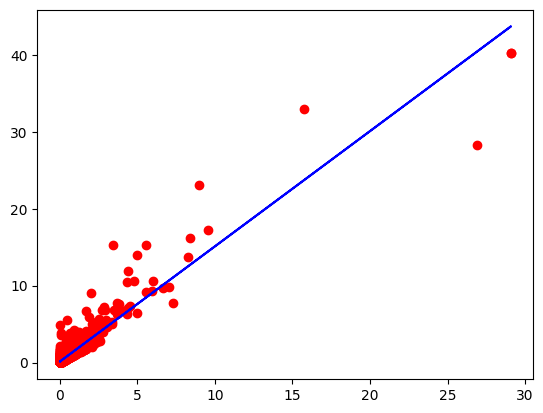

In [22]:
# Visualisasi hasil Training Set
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regre.predict(x_train), color = 'blue')
plt.show()

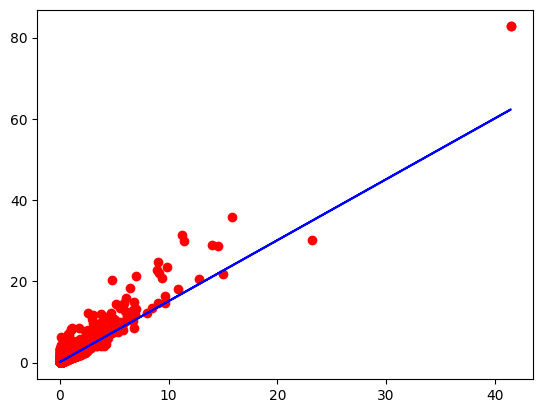

In [23]:
# Visualisasi hasil Test Set
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regre.predict(x_test), color = 'blue')
plt.show()